In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p))))))
\end{eqnarray}""")

<IPython.core.display.Latex object>

# starfish figure: a numerical discovery.

    Sequential iteration of difference equation:
    Z = Z^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p))))))
    
    with parameter set:
    p = = -0.040431211565+0.388620268274i
    on the complex plane produces a bug like figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def starfish_ish(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    return Z**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p))))))

In [4]:
#                                        -- machine with 4 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(starfish_ish, (-0.040431211565+0.388620268274j))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

28.264814138412476 	 total time
converstion time =	 1.349761962890625


coloring time =	 2.743166923522949


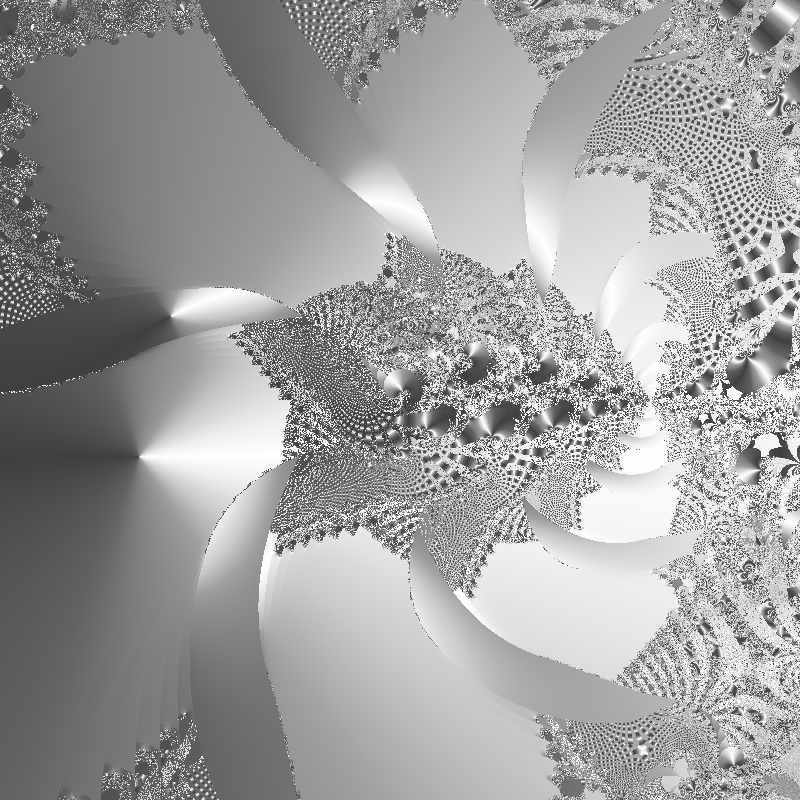

In [5]:
t0 = time.time()
ZrN = ncp.range_norm(Zr, lo=0.25, hi=1.0)
R = ncp.gray_mat(ZrN)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 6.427456855773926


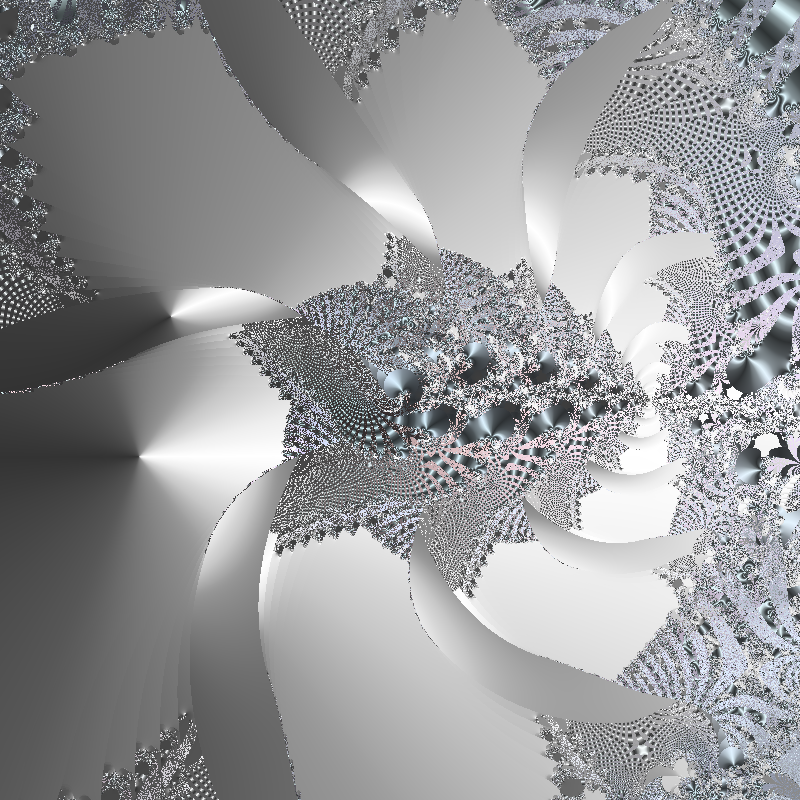

In [6]:
H = ncp.range_norm(1 - Zd, lo=0.5, hi=1.0)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.15)
V = ncp.range_norm(Zr, lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 6.3900370597839355


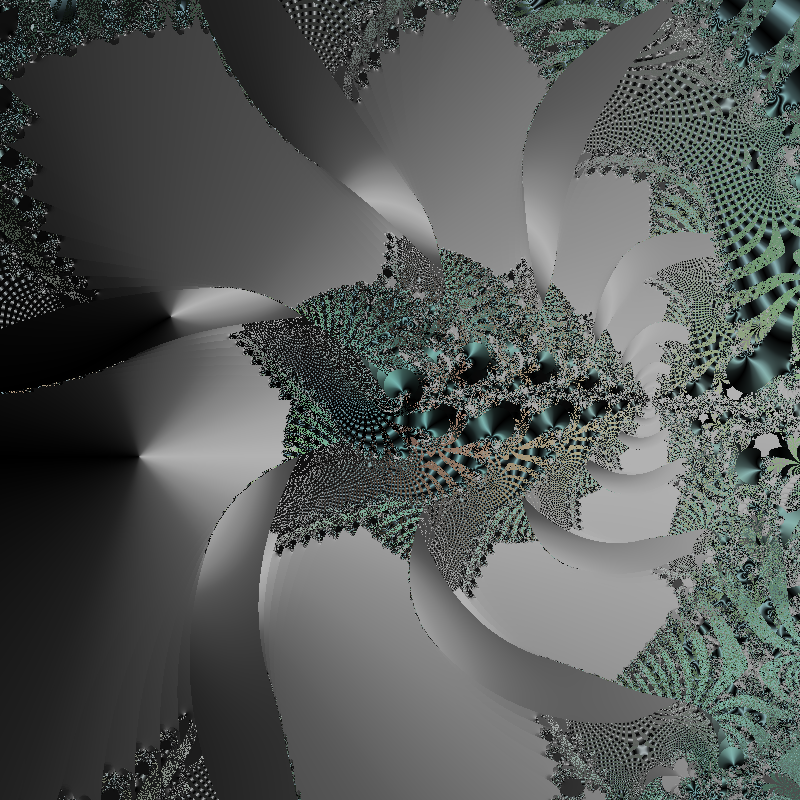

In [7]:
H = ncp.range_norm(Zd, lo=0.05, hi=0.55)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.35)
V = ncp.range_norm(Zr, lo=0.0, hi=0.7)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [8]:
#                                        smaller for analysis
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(starfish_ish, (-0.040431211565+0.388620268274j))]

t0 = time.time()
ET_sm, Z_sm, Z0_zm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

1.9255390167236328 	 total time


ET =	 1


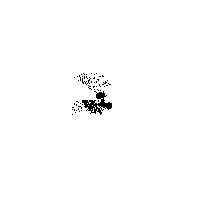

ET =	 2


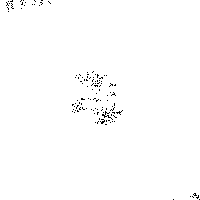

ET =	 3


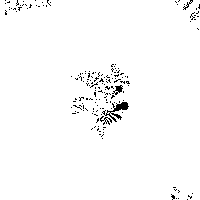

ET =	 4


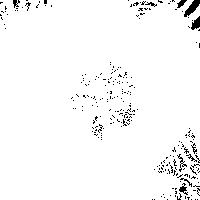

ET =	 5


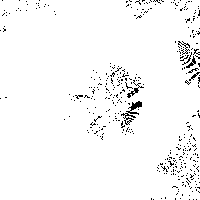

ET =	 6


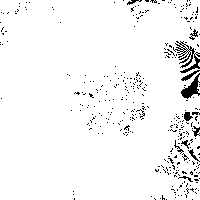

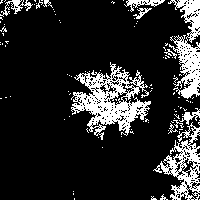

In [9]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [10]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 412
2 296
3 766
4 1144
5 1236
6 1671
7 821
8 815
9 533
10 613
11 532
12 608
13 611
14 637
15 628
16 669

How many never escaped:
> 28008


In [11]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('One Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

One Unescaped Vector:
	V =  2.26 135.0 degrees

    28008 total unescaped points

   points near V       (plane units)
    28008 within V/ 1  (2.263)
    28008 within V/ 2  (1.131)
    20977 within V/ 3  (0.754)
    13150 within V/ 4  (0.566)
     8955 within V/ 5  (0.453)
     6111 within V/ 6  (0.377)
     4410 within V/ 7  (0.323)
     3395 within V/ 8  (0.283)
     2639 within V/ 9  (0.251)
     2089 within V/10  (0.226)
     1677 within V/11  (0.206)
